# Compulsory Assignment 01

## Starting by importing the nessescary packages

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set(context = 'paper', style = 'whitegrid')
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
from pprint import pprint


# Part 1

In [4]:
A = pd.read_excel("A.xlsx")
B = pd.read_excel("B.xlsx")
C = pd.read_excel("C.xlsx")
D = pd.read_excel("D.xlsx")

In [5]:
dataset = {"A" : A, "B" : B, "C" : C, "D" : D} 

# Part 2

### I'm creating a dictionary with the datasets. It will make it easier to get the names of the datasets for the printout,  as well as the data

In [9]:
for x in dataset:
    sets = dataset[x]
    print(f'Missing values in dataframe {x}:', sets.isnull().values.any())

Missing values in dataframe A: True
Missing values in dataframe B: False
Missing values in dataframe C: True
Missing values in dataframe D: True


#### Accessing each dataset in the dictionary
#### is.na() stores each value as a True/False statement. If True, there is a NaN in the value. So the output will be a dataset containing only True/False statements
#### Values.any() tells us if there is any NaN in the whole dataset. 

In [12]:
for x in dataset:
    sets = dataset[x]
    columns = list(sets.loc[:, sets.columns!= "id"].isna().sum()) #storing a variale to make the code easier to read
    print(f'Number of missing values in each column in {x}: {columns}')

  

Number of missing values in each column in A: [1, 2, 1, 2]
Number of missing values in each column in B: [0, 0, 0, 0, 0, 0, 0]
Number of missing values in each column in C: [4, 3, 4, 3, 0]
Number of missing values in each column in D: [1, 0, 1, 0, 1, 2, 3, 3, 3, 3]


#### The first thing I do is to exclude every column that contains "ID", as that's not the data we're interested in. Using "loc" to locate those columns
#### Again using is.na() but including the sum() function to get the amount of NaN in each column
#### In the end I store the values in a list

In [13]:
for x in dataset:
    sets = dataset[x]
    sum_of_NaN = sum(list(sets.loc[:, sets.columns!= "id"].isna().sum()))
    print(f'total number of missing values in {x}: {sum_of_NaN}')

total number of missing values in A: 6
total number of missing values in B: 0
total number of missing values in C: 14
total number of missing values in D: 17


#### Excluding every column that is "ID" again. 
#### The procedure is pretty much the same. The difference is that I use the sum function to get the summation of the values in the list

In [14]:
for x in dataset:
    sets = dataset[x]
    indexing = pd.isna(sets).any(1).to_numpy().nonzero()[0]
    objects = list(sets['id'][indexing])
    print(f'ID of rows with missing values in {x}: {objects}')
    

ID of rows with missing values in A: ['obj 5', 'obj 36', 'obj 120', 'obj 166']
ID of rows with missing values in B: []
ID of rows with missing values in C: ['obj 5', 'obj 138', 'obj 141', 'obj 143']
ID of rows with missing values in D: ['obj 55', 'obj 80', 'obj 120', 'obj 162', 'obj 184', 'obj 185']


#### I try to get the index values of every column that is NaN so I can easily extract the object that belongs to the NaN value.
#### I then use the indexing variable, which contains the index of every NaN value, to get a list of all the objects which has NaN value.

# Part 3

In [18]:
index_verdi = []
for x in dataset:
    sets = dataset[x]
    index_verdi.append(pd.isna(sets).any(1).to_numpy().nonzero()[0])
    #index_verdi2 = list(x[x.isnull().any(axis=1)].index)
index_verdi = list(chain(*index_verdi))

print(index_verdi)
#print(index_verdi2)

for y in dataset:
    dataset[y] = dataset[y].drop(index_verdi)


[4, 35, 119, 165, 4, 137, 140, 142, 54, 79, 119, 161, 183, 184]


#### Creating an empty list which later will contain each index value for us to remove
#### Using chain to "unlist" multiple lists within a list

#### Then iterating through each dataset and dropping the same index values (12 in total)

# Part 4

amount of rows and columns in the dataset is: (188, 5)


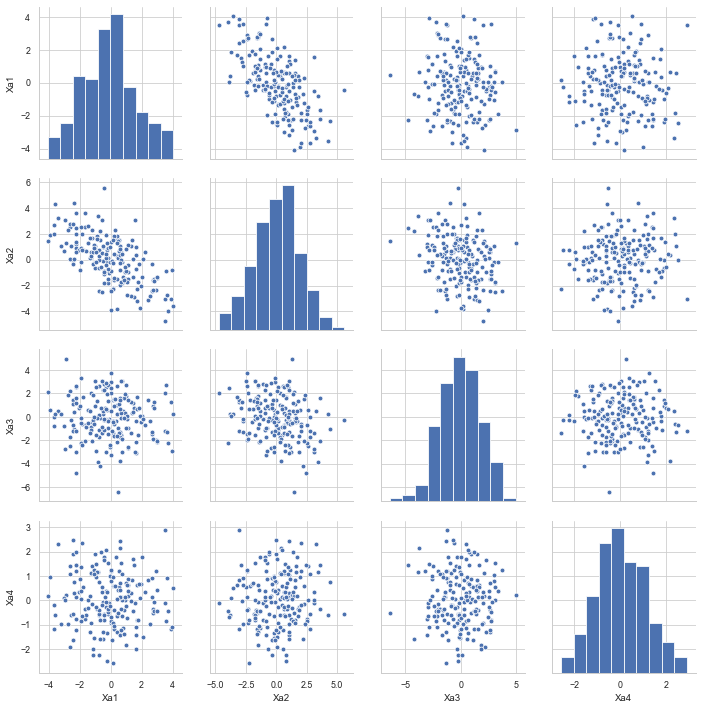

In [81]:
sns.pairplot(dataset['A'])
rows_columns = dataset['A'].shape
print(f'amount of rows and columns in the dataset is: {rows_columns}')


Amount of rows and columns in the dataset is: (188, 8)


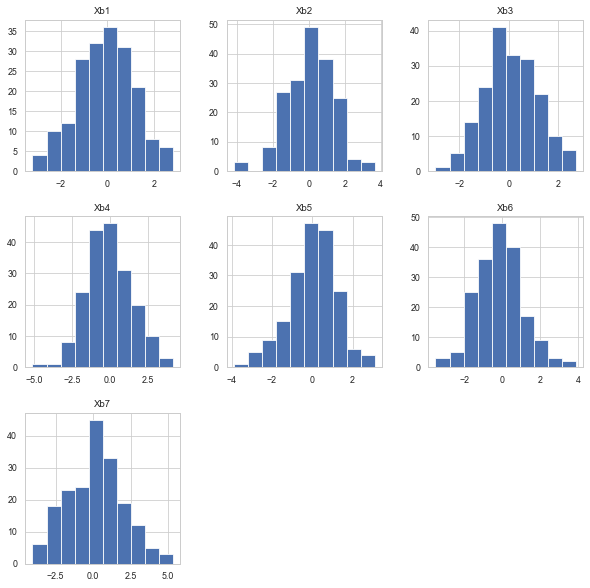

In [82]:
dataset['B'].hist(figsize= (10,10))
rows_columns = dataset['B'].shape
print(f'Amount of rows and columns in the dataset is: {rows_columns}')

Amount of rows and columns in the dataset is: (188, 6)


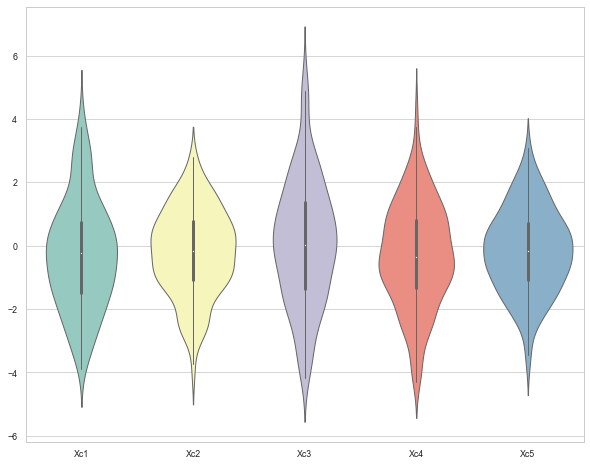

In [83]:
fig, ax = plt.subplots(figsize = (10,8))
sns.violinplot(data = dataset['C'], palette = "Set3", ax = ax, linewidth = 1)
rows_columns = dataset['C'].shape
print(f'Amount of rows and columns in the dataset is: {rows_columns}')


Amount of rows and columns in the dataset is: (188, 11)


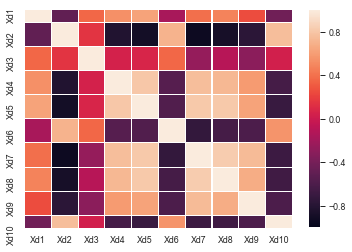

In [84]:
sns.heatmap(dataset['D'].corr(), linewidth = .1, vmax = 1, vmin = -1)
rows_columns = dataset['D'].shape
print(f'Amount of rows and columns in the dataset is: {rows_columns}')